Retrieved 30 ticker symbols.
Retrieving data for AAPL
Retrieving data for NFLX
Retrieving data for AMZN
Retrieving data for MSFT
Retrieving data for GOOG
Retrieving data for TSLA
Retrieving data for FB
Retrieving data for AAP
Retrieving data for DIS
Retrieving data for NKE
Retrieving data for UA
Retrieving data for BAC
Retrieving data for CCL
Retrieving data for CI
Retrieving data for AAL
Retrieving data for LUV
Retrieving data for WFC
Retrieving data for WMT
Retrieving data for HD
Retrieving data for ORCL
Retrieving data for IBM
Retrieving data for NCLH
Retrieving data for RCL
Retrieving data for TWX
Retrieving data for FOX
Retrieving data for F
Retrieving data for GCI
Retrieving data for XOM
Retrieving data for WWE
Retrieving data for WM


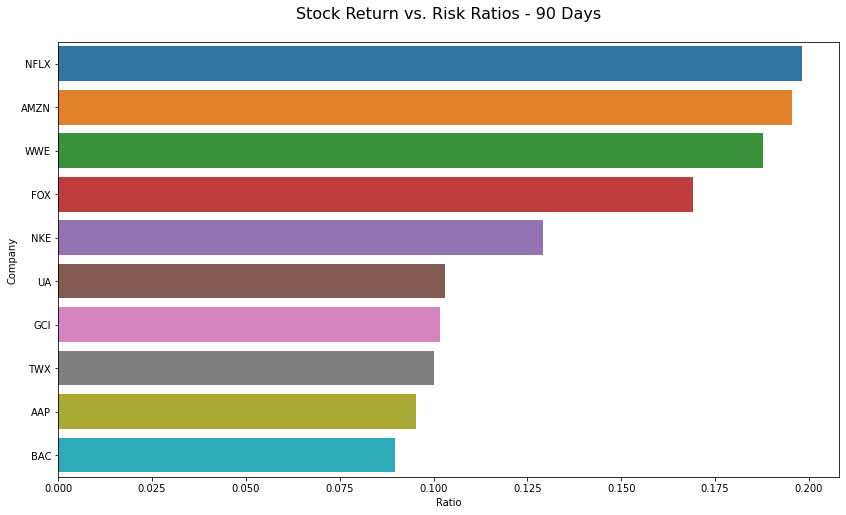

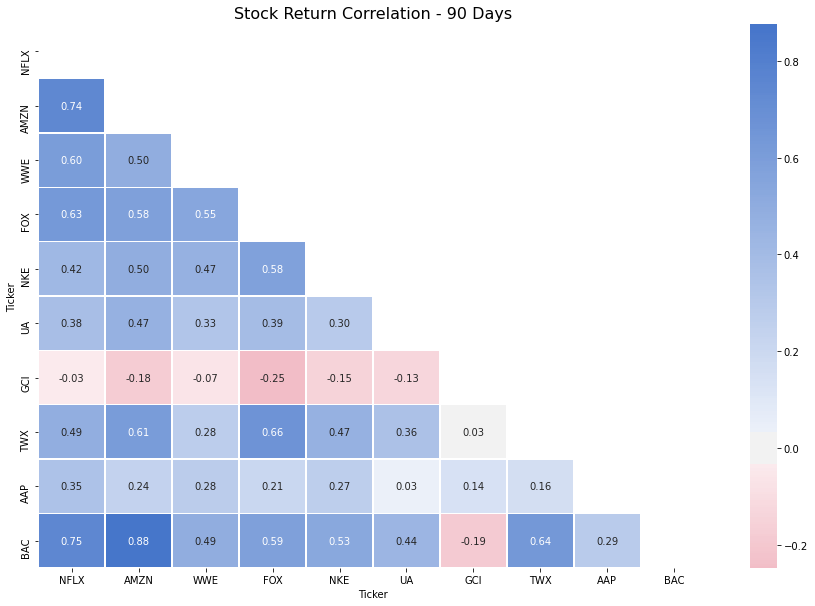

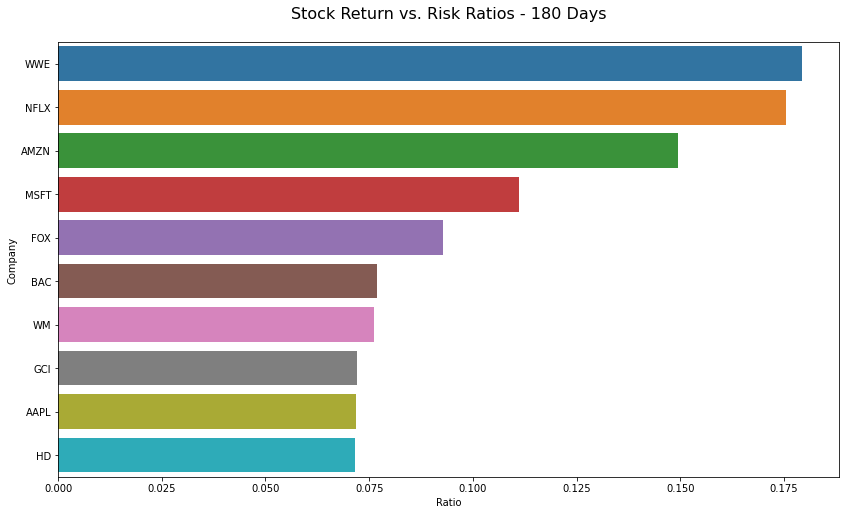

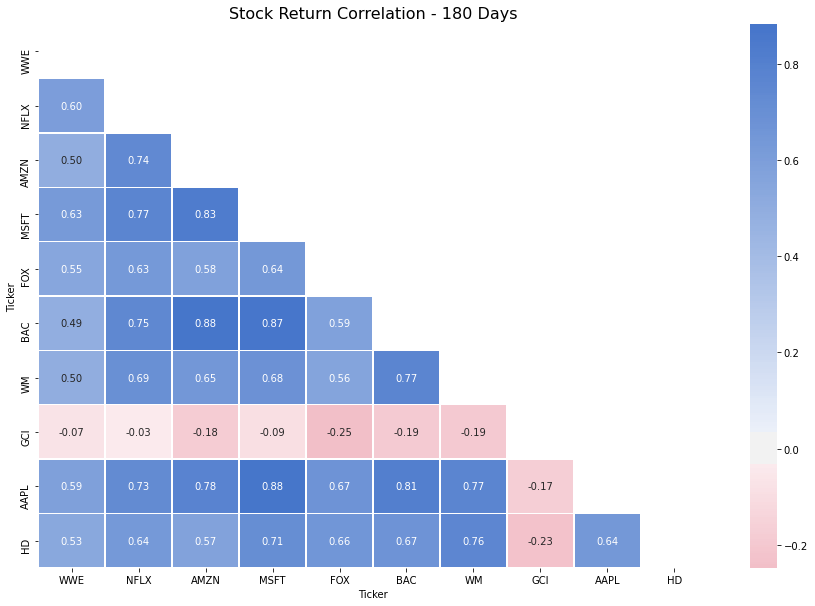

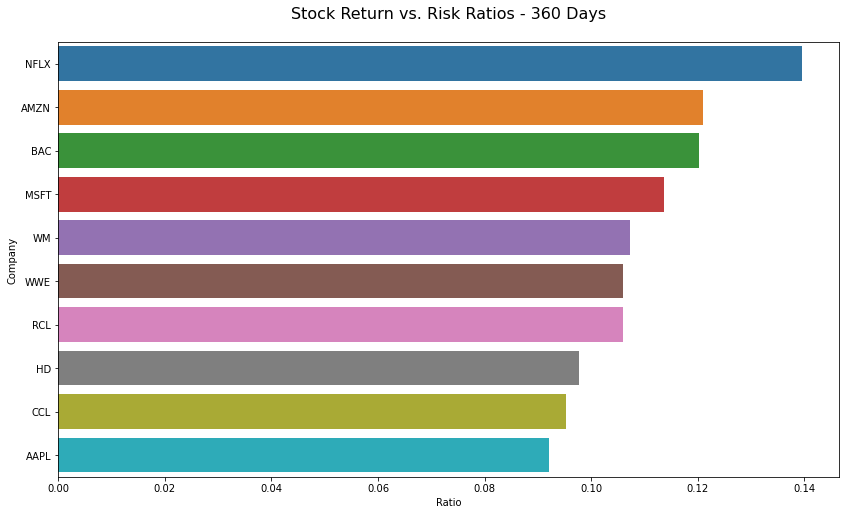

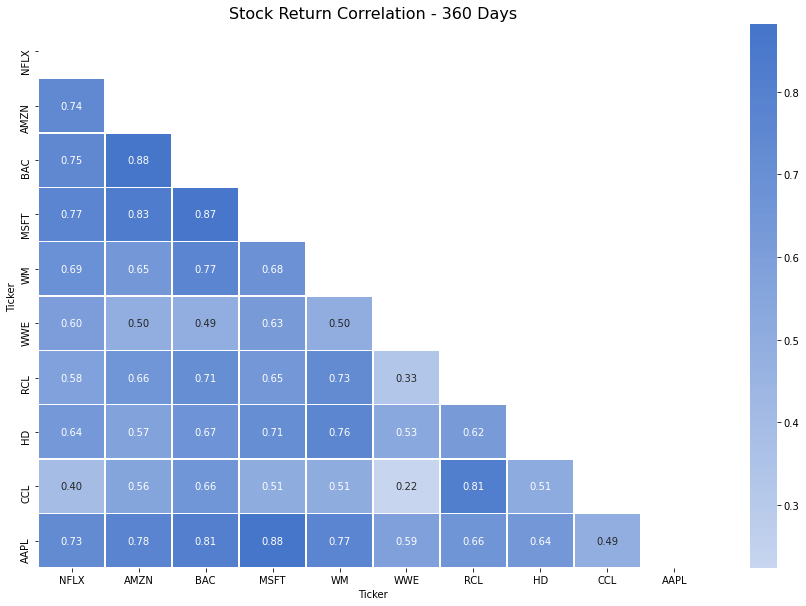

In [3]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
def get_tickers(path):
    companies = pd.read_csv(path)
    ticker_list = list(companies['Ticker'])
    print('Retrieved', str(len(ticker_list)), 'ticker symbols.')  # Retrieved 30 ticker symbols.
    return ticker_list
 
def get_prices(ticker):
    print('Retrieving data for', ticker)
    quandl.ApiConfig.api_key = "wFgfKysYFfPaxtu2uMGs"
    prices = quandl.get('WIKI/' + ticker)['Adj. Close'].reset_index()  # historical time-series of AAPL’s stock price:https://www.quandl.com/api/v3/datasets/WIKI/AAPL.csv
    prices['Ticker'] = ticker
    return prices
 
def concat_pivot(data, rows, columns, values):
    df = pd.concat(data, sort=True)                                    # data=dacquire()  data is a list    
    pivot = df.pivot_table(values=values, columns=columns, index=rows)
    return pivot
 
def compute_returns(df):
    returns = df.pct_change()
    return returns
 
def return_risk_ratio(df, days=30):
    means = pd.DataFrame(df.tail(days).mean())
    std = pd.DataFrame(df.tail(days).std())
    ratios = pd.concat([means, std], axis=1).reset_index()
    ratios.columns = ['Company', 'Mean', 'Std']
    ratios['Ratio'] = ratios['Mean']/ratios['Std']
    return ratios
 
def corr_matrix(df, days=30):
    corr_matrix = df.tail(days).corr()
    return corr_matrix
 
def barchart(df, x, y, length=8, width=14, title=""):
    df = df.sort_values(x, ascending=False)
    plt.figure(figsize=(width,length))
    chart = sns.barplot(data=df, x=x, y=y)
    plt.title(title + "\n", fontsize=16)
    return chart
 
def correlation_plot(corr, title=""):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
 
    plt.subplots(figsize=(15, 10))
    cmap = sns.diverging_palette(6, 255, as_cmap=True)
    
    chart = sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5, annot=True, fmt='.2f')
    plt.title(title, fontsize=16)
    return chart
 
def save_viz(chart, title):
    fig = chart.get_figure()
    fig.savefig(title + '.png')
 
def acquire():
    data = []     # the list of 'data' will be used in def concat_pivot(data, rows, columns, values)
 
    ticker_list = get_tickers('companies.csv')
 
    for ticker in ticker_list:
        prices = get_prices(ticker)
        data.append(prices)
    return data
 
def wrangle(data):
    pivot = concat_pivot(data, 'Date', 'Ticker', 'Adj. Close')
    returns = compute_returns(pivot)
    return returns
 
def analyze(returns, days=30):
    ratios = return_risk_ratio(returns, days=days)
    top10 = ratios.sort_values('Ratio', ascending=False).head(10)
    
    target_list = returns[list(top10['Company'])]
    correlation = corr_matrix(target_list)
    return top10, correlation
 
def report(top10, correlation):
    bar_plot = barchart(top10, 'Ratio', 'Company', title='Stock Return vs. Risk Ratios - ' + str(day) + ' Days')
    save_viz(bar_plot, 'Return vs. Risk Top 10 - ' + str(day) + ' Days')
    
    corr_plot = correlation_plot(correlation, title='Stock Return Correlation - ' + str(day) + ' Days')
    save_viz(corr_plot, 'Correlation Plot - ' + str(day) + ' Days')
 
if __name__ == "__main__":
    data = acquire()
    returns = wrangle(data)
 
    num_days = [90,180,360]
 
    for day in num_days:
        top10, correlation = analyze(returns, days=day)
        report(top10, correlation)